In [1]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import stats
from datetime import datetime
import experiment_participant_analysis as epa
from importlib import reload

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 60)

In [2]:
# import
dataframe = pd.read_csv('data/Exp1/dataframe_complete.csv')

In [3]:
dataframe

,pid,condition,condition_type,beginHit,beginExp,endHit,totalTime,attempts,genEdu,comEdu,age,gender,qUnd,qDes,feedback,cheatTrials,status,numberClicks,rews_exp,rews_exp_total,rews_exp_mean,scores,pa_mean,pa_complete,pa_et
0,0,0,experimental,2020-02-23 19:41:45.204572,2020-02-23 19:53:26.441751,NaN,-,-,-,-,-,-,-,-,-,4,6,[],[],0.0,NaN,[],0.5455,"[0.154, 0.077, 1.0, 0.667, 0.625, 0.75]","[10.0, 5.0, 0, 0, 0, 0]"
1,1,0,experimental,2020-02-23 18:54:58.045187,2020-02-23 18:59:15.98889,2020-02-23 19:03:04.339512,486,1,High school graduate,No,32,male,Yes,Click on the highest nodes until you find a 48. Move the...,no,0,4,"[4, 5, 5, 4, 1, 4, 6, 3, 4, 1]","[44, 43, 43, 44, 47, 44, 18, 45, 44, 47]",419.0,41.90,"[38, 45, 39, 52, 45, 48, 20, 51, 48, 53]",0.9462,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.462, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 7.0, 0, 0, 0]"
2,2,0,experimental,2020-02-23 18:48:57.811508,2020-02-23 18:55:18.62474,2020-02-23 19:03:33.00374,875,1,College degree,Yes,38,female,yes,Click on the top row only until you find the green 48.,NaN,0,4,"[3, 1, 6, 6, 2, 3, 1, 4, 5, 1]","[45, 47, 18, 18, 22, 21, 47, 44, 43, 47]",352.0,35.20,"[21, 41, 16, 12, 20, 27, 47, 48, 49, 47]",0.7581,"[1.0, 1.0, 0.462, 0.462, 0.426, 0.231, 1.0, 1.0, 1.0, 1.0]","[0, 0, 7.0, 7.0, 2.691, 10.0, 0, 0, 0, 0]"
3,3,0,experimental,2020-02-23 18:48:22.476527,2020-02-23 18:55:29.802933,2020-02-23 19:04:36.95581,974,1,High school graduate,No,35,female,No not at all. I was very confused as to how to use the ...,Try to move up the tree with the flow chart which tell y...,NaN,2,4,"[12, 6, 0, 0, 4, 3, 3, 7, 5, 7]","[28, 38, 0, 0, 22, 1, 1, 19, 23, 21]",153.0,15.30,"[28, 42, -12, -34, 26, -19, -51, 15, 19, 29]",0.1771,"[0.462, 0.222, 0.0, 0.0, 0.124, 0.0, 0.0, 0.308, 0.235, ...","[0, 2.992, 4.519, 3.269, 4.055, 3.329, 10.0, 6.0, 3.5, 2..."
4,4,0,experimental,2020-02-23 18:57:06.190456,2020-02-23 19:00:52.794445,2020-02-23 19:06:01.822841,535,1,College degree,No,-,-,-,-,NaN,0,4,"[3, 6, 12, 12, 7, 4, 11, 11, 2, 4]","[57, 54, 24, 36, 29, 50, 27, 37, 46, 44]",404.0,40.40,"[-41, 54, 24, 36, 29, 50, 27, 37, 58, 40]",0.5885,"[0.5, 0.429, 0.538, 0.538, 0.556, 0.4, 0.462, 0.462, 1.0...","[0, 0, 0, 0, 2.0, 0, 2.0, 2.0, 0, 0]"
5,5,0,experimental,2020-02-23 18:51:57.224418,2020-02-23 19:00:39.16406,2020-02-23 19:07:04.87051,907,2,College degree,No,49,male,Yes,"Once you achieve 48 at the top, there is not higher to g...",Have a great day!,0,4,"[7, 9, 12, 9, 7, 7, 7, 10, 12, 9]","[47, 45, 14, 39, 45, 53, 47, 44, 18, 35]",387.0,38.70,"[47, 45, 14, 39, 45, 53, 47, 44, 18, 35]",0.3316,"[0.25, 0.231, 0.538, 0.4, 0.25, 0.25, 0.25, 0.455, 0.538...","[0, 4.0, 0, 0, 0, 0, 0, 0, 0, 4.0]"
6,6,0,experimental,2020-02-23 18:57:52.388959,2020-02-23 19:04:46.459641,2020-02-23 19:08:07.745012,615,2,College degree,No,32,Female,Not really I was still so confused.,I would not be able to explain it,NaN,0,4,"[3, 4, 10, 7, 7, 4, 3, 6, 3, 5]","[-3, 48, 16, 39, 13, 24, 49, 18, 41, 43]",288.0,28.80,"[-53, 50, -64, 43, 17, 26, 53, 24, 43, 41]",0.4607,"[0.0, 0.4, 0.462, 0.5, 0.462, 0.267, 0.304, 0.462, 0.75,...","[4.542, 0, 3.0, 0, 6.0, 3.493, 3.57, 7.0, 0, 0]"
7,7,0,experimental,2020-02-23 19:03:00.345244,2020-02-23 19:08:24.524869,2020-02-23 19:13:34.366655,634,1,High school graduate,No,37,Female,Only click on trees that had a positive 48,"Start at the top leaf, click until you find+48 then if t...",NaN,0,4,"[11, 11, 11, 10, 6, 7, 12, 11, 8, 8]","[39, 39, 49, 44, 42, 49, 12, 43, 40, 34]",391.0,39.10,"[39, 39, 49, 44, 54, 51, 12, 43, 40, 34]",0.4880,"[0.308, 0.417, 0.538, 0.462, 0.385, 0.462, 0.846, 0.538,...","[2.0, 0, 2.0, 3.0, 7.0, 6.0, 0, 2.0, 5.0, 5.0]"
8,8,0,experimental,2020-02-23 19:06:47.213581,2020-02-23 19:10:57.738145,2020-02-23 19:13:57.847826,430,1,College degree,No,26,female,Yes,To look for the 48's which will only be at the top of th...,NaN,0,4,"[1, 6, 1, 6, 5, 1, 9, 2, 6, 2]","[47, 42, 47, 18, 43, 47, 11, 46, 18, 46]",365.0,36.50,"[43, 42, 59, 24, 49, 39, 15, 54, 24, 54]",0.8616,"[1.0, 1.0, 1.0, 0.4

In [4]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [5]:
def r(number):
    return round(number,2)

def getDropoutStats(df1,df2, title):
    print('')
    print(title)
    print('Initial participants: {}'.format(len(df1)))
    print('Difference: {}'.format(len(df1) - len(df2)))
    print('Percentage: {}'.format(r(1-len(df2)/len(df1))))
    
    for c in df1.condition_type.unique().tolist():
        print('Percentage in condition {}: {}'.format(c,r(1-len(df2[df2.condition_type == c])/len(df1[df1.condition_type == c]))))
        
        

In [6]:
# filter for finished
df_valid_all = dataframe[dataframe.status != 6]
df_valid_all.reset_index(inplace = True, drop=True)
getDropoutStats(dataframe, df_valid_all, 'Dropouts')

# filter with exclusion criterion
df_valid = df_valid_all[df_valid_all.cheatTrials < 10]
getDropoutStats(df_valid_all, df_valid, 'Exclusion')


df_exp = df_valid[df_valid.condition == 0]
df_cont = df_valid[df_valid.condition == 1]
dfs = [df_exp ,df_cont]

print('')
print(len(df_exp))
print(len(df_cont))


Dropouts
Initial participants: 181
Difference: 9
Percentage: 0.05
Percentage in condition experimental: 0.06
Percentage in condition control: 0.03

Exclusion
Initial participants: 172
Difference: 15
Percentage: 0.09
Percentage in condition experimental: 0.09
Percentage in condition control: 0.08

79
78


In [7]:
# ............................ Results .....................................................
# ..........................................................................................
# ..........................................................................................

In [32]:
print(stats.shapiro(df_valid.pa_mean))
print(stats.fligner(df_exp.pa_mean, df_cont.pa_mean))

(0.9421564340591431, 4.8965516725729685e-06)
FlignerResult(statistic=0.9778054721726346, pvalue=0.3227412009323613)


In [37]:
epa.print_statistics2(df_exp, df_cont, 'pa_mean')

 -- df1 -- 
Median: 0.7414
Mean: 0.6699
Std: 0.2819
($0.7414\% \; (M= 0.6699\%, SD = 0.2819\%)$)

 -- df2 -- 
Median: 0.4658
Mean: 0.4687
Std: 0.2581
($0.4658\% \; (M= 0.4687\%, SD = 0.2581\%)$)

 -- test-- 
t: 4.6329, p_val: 7.59e-06
u: 1773.5, p_val: 2.2e-06



In [10]:
print(stats.shapiro(df_valid.rews_exp_mean))
print(stats.fligner(df_exp.rews_exp_mean, df_cont.rews_exp_mean))

(0.7726477384567261, 2.4958561015446176e-14)
FlignerResult(statistic=0.828968603222099, pvalue=0.36257093775935045)


In [38]:
epa.print_statistics2(df_exp, df_cont, 'rews_exp_total')

 -- df1 -- 
Median: 368.0
Mean: 344.7468
Std: 118.5437
($368.0\% \; (M= 344.7468\%, SD = 118.5437\%)$)

 -- df2 -- 
Median: 332.5
Mean: 284.1026
Std: 133.3034
($332.5\% \; (M= 284.1026\%, SD = 133.3034\%)$)

 -- test-- 
t: 2.9938, p_val: 0.0032075
u: 2110.0, p_val: 0.00032796



In [39]:
print(36.8/39.97)
print(33.25/39.97)

0.9206905178884163
0.8318739054290718


In [13]:
#correlation
stats.pearsonr(df_valid.rews_exp_total.tolist(), df_valid.pa_mean.tolist())

(0.816083660238029, 9.639741353508964e-39)

In [14]:
print(len(df_exp[df_exp.pa_mean > 0.5])/len(df_exp))
print(len(df_cont[df_cont.pa_mean > 0.5])/len(df_cont))

0.7088607594936709
0.46153846153846156


In [15]:
print(len(df_exp[df_exp.pa_mean > 0.8])/len(df_exp))
print(len(df_cont[df_cont.pa_mean > 0.8])/len(df_cont))

0.4810126582278481
0.08974358974358974


In [16]:
#df_valid_all

In [17]:
# ............................ Plots .....................................................
# ..........................................................................................
# ..........................................................................................

[0.1, 0.30000000000000004, 0.5, 0.7, 0.9]


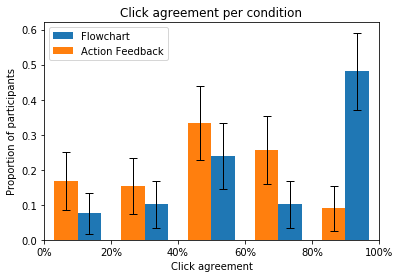

In [18]:
epa.create_barplot(df_exp, df_cont, 'pa_mean', [0 , 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
plt.xticks([0., 0.2, 0.4,  0.6,  0.8,  1], labels=['0%', '20%','40%', '60%', '80%','100%'])
plt.title('Click agreement per condition')
plt.xlabel('Click agreement')
plt.ylabel('Proportion of participants')
plt.savefig('plots/Exp1/exp1_ca.png', dpi=300)

-1.0
45.6
[-2.  8. 18. 28. 38. 48.]
[ 3. 13. 23. 33. 43.]
[3.0, 13.0, 23.0, 33.0, 43.0]


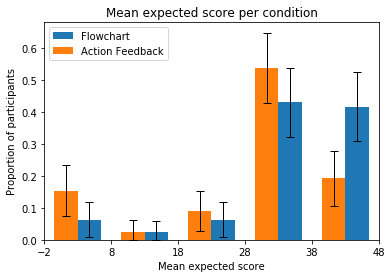

In [19]:
epa.create_barplot(df_exp, df_cont, 'rews_exp_mean', epa.getBins(df_valid.rews_exp_mean.tolist(), 5))
plt.legend()
plt.title('Mean expected score per condition')
plt.xlabel('Mean expected score')
plt.ylabel('Proportion of participants')
plt.savefig('plots/Exp1/exp1_emr.png', dpi=300)

In [20]:
# ............................ Stats .....................................................
# ..........................................................................................
# ..........................................................................................

In [21]:
#df_valid_all[df_valid_all.condition == 3].qConf.tolist()
#df_valid_all[df_valid_all.condition == 3].qDesc.tolist()
#df_valid_all[df_valid_all.condition == 1].qDiff.tolist()
#df_valid_all[df_valid_all.condition == 3].feedback.tolist()

617.6744186046511
833.7974683544304
406.88461538461536


(array([168.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 236. , 1144.1, 2052.2, 2960.3, 3868.4, 4776.5, 5684.6, 6592.7, 7500.8, 8408.9, 9317. ]),
 <a list of 10 Patch objects>)

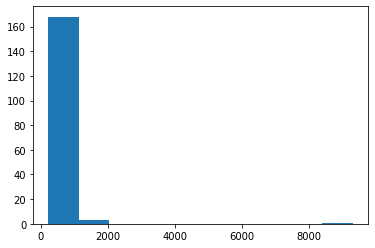

In [22]:
# calculate mean time 
tt = [int(float(a)) for a in df_valid_all['totalTime'].to_list() if a != '-']
print(np.mean(tt))

# calculate mean time 
tt = [int(float(a)) for a in df_exp['totalTime'].to_list() if a != '-']
print(np.mean(tt))

# calculate mean time 
tt = [int(float(a)) for a in df_cont['totalTime'].to_list() if a != '-']
print(np.mean(tt))

plt.hist(df_valid_all.totalTime.astype(float))

In [23]:
# calculate mean age:
# typos
df_valid_all.age[33] = 21
df_valid_all.age[69] = 21
df_valid_all.age[47] = '-'
df_valid_all.age[140] = 36
df_valid_all.age[169] = 52
df_valid_all.age[13] = '-'

age_temp = df_valid_all[df_valid_all.age != '-' ].age.astype(int)

print( np.mean( age_temp ) )
print( np.min( age_temp ) )
print( np.max( age_temp ) )

38.061349693251536
18
69


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [24]:
# calculate gender:
gender_temp = df_valid_all[ df_valid_all.gender != '-'].gender.str.lower().str.contains("f")
print(np.sum(gender_temp))

85


In [25]:
# stats attempts
print(df_valid_all.attempts.min())
print(df_valid_all.attempts.max())
df_valid_all.attempts.astype(int).mean()

1
8


1.3895348837209303

In [26]:
# stats genEdu
df_valid_all.groupby('genEdu')['pid'].nunique()

genEdu
-                           1
College degree            106
High school graduate       64
No schooling completed      1
Name: pid, dtype: int64

In [27]:
# stats comEdu
df_valid_all.groupby('comEdu')['pid'].nunique()

comEdu
-        1
No     134
Yes     37
Name: pid, dtype: int64

0
9
0.4050632911392405


(array([70.,  3.,  3.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

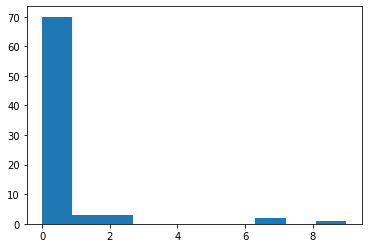

In [28]:
# stats cheat
print(df_exp.cheatTrials.min())
print(df_exp.cheatTrials.max())
print(df_exp.cheatTrials.mean())
plt.hist(df_exp.cheatTrials)